In [0]:
from google.colab import drive
import os
import pandas as pd
import seaborn as sns
drive.mount('/fiap_mba_ia')
import numpy as np
import re
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import pickle

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

from sklearn.metrics import confusion_matrix

Drive already mounted at /fiap_mba_ia; to attempt to forcibly remount, call drive.mount("/fiap_mba_ia", force_remount=True).


In [0]:
##mudando para o drive correto
os.chdir('/fiap_mba_ia')
os.chdir('My Drive/fiap_mba_ia')

In [0]:
#### leitura dos datasets

df_Cliente_raw = pd.read_csv('FIAP Dataset 1.csv', encoding='utf8')
df_Navegacao_raw = pd.read_csv('Dataset-2.csv', encoding='utf8')
df_Catalogo_raw = pd.read_csv('Dataset-3.csv', encoding='utf8')

In [0]:
### tamanho dos dataframes

print(df_Cliente_raw.shape)
print(df_Navegacao_raw.shape)
print(df_Catalogo_raw.shape)

(52857, 60)
(382937, 4)
(8603, 86)


Text(0.5, 1.0, 'Nulos em cliente')

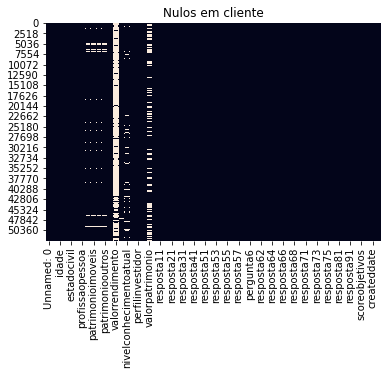

In [0]:
## analisando total de nulos cliente
graf = sns.heatmap(df_Cliente_raw.isnull(), cbar=False)
graf.set_title('Nulos em cliente')

Text(0.5, 1.0, 'Nulos em Navegacao')

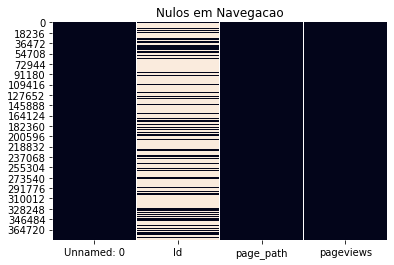

In [0]:
graf = sns.heatmap(df_Navegacao_raw.isnull(), cbar=False)
graf.set_title('Nulos em Navegacao')

Text(0.5, 1.0, 'Nulos em Catalogo')

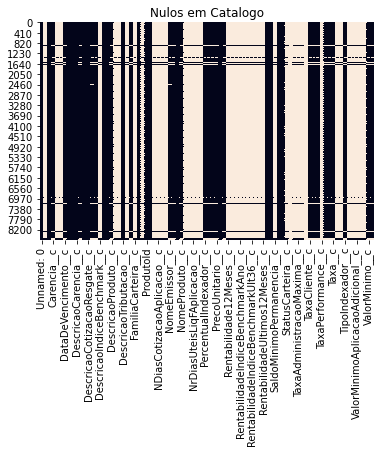

In [0]:
graf = sns.heatmap(df_Catalogo_raw.isnull(), cbar=False)
graf.set_title('Nulos em Catalogo')

In [0]:
df_cliente_produto = pd.merge(df_Cliente_raw, df_Catalogo_raw, how='left', left_on='produto', right_on='ProdutoId')
df_cliente_produto.shape

(52857, 146)

In [0]:
df_Navegacao_raw.groupby(['Id']).count()

,Unnamed: 0,page_path,pageviews
Id,,,
$2b$10$.DCvvJ9WSDpqVP2xXjeSPe..Fx6NhsrK9ZzYadqLqCW.2eZGk5deO,10,10,10
$2b$10$.DCvvJ9WSDpqVP2xXjeSPe..kI2Jy5NBFp0bWHGhmx/IyYNI1OYWK,5,5,5
$2b$10$.DCvvJ9WSDpqVP2xXjeSPe./RaD5ilKiZI.7HikaJK79StZZerIWS,6,6,6
$2b$10$.DCvvJ9WSDpqVP2xXjeSPe./VfMzqzrDosESSEWIeUhRXCRi4HFi2,7,7,7
$2b$10$.DCvvJ9WSDpqVP2xXjeSPe./h2nCG51DS8AEwV8jlT.DxtnyZth9W,8,8,8
...,...,...,...
$2b$10$.DCvvJ9WSDpqVP2xXjeSPezy43dzByBFK4pCz0EDtB3yrDM.nRkAi,5,5,5
$2b$10$.DCvvJ9WSDpqVP2xXjeSPezyeSd2gKNN93Cst3RneLLTpUqwJ8mxi,6,6,6
$2b$10$.DCvvJ9WSDpqVP2xXjeSPezyjwuCA54Wfbul7aMnK05rj6SWqw.pu,9,9,9


In [0]:
df_Navegacao_stage = df_Navegacao_raw.dropna()
df_Navegacao_stage.shape

(102233, 4)

In [0]:
prog = re.compile('[0-9a-zA-Z]{18}')

def ExtraiProdutos(x):
  """Extrai o produto do page_path"""
  f = re.search(prog, x)
  if f:
      return f.group().strip()
  else:
      return 'Sem Produto'
df_Navegacao_stage['ProdutoId'] = [ExtraiProdutos(x) for x in df_Navegacao_stage['page_path']]

df_Navegacao_stage.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Unnamed: 0,Id,page_path,pageviews,ProdutoId
23,23,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeMrZPoxq911ZU5Z.1c...,/s/,14,Sem Produto
24,24,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeMrZPoxq911ZU5Z.1c...,/s/historico,0,Sem Produto
25,25,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeMrZPoxq911ZU5Z.1c...,/s/produtos/a0W6A000008FwYQUA0/SAM JURO REAL R...,0,a0W6A000008FwYQUA0
26,26,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeMrZPoxq911ZU5Z.1c...,/s/produtosprincipal,13,Sem Produto
27,27,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeMrZPoxq911ZU5Z.1c...,/s/vitrine?secao=maisBuscados,1,Sem Produto


In [0]:
### Cria uma tabela com o total de Pageviews dela por produto ID
df_Navegacao_produto = df_Navegacao_stage[['ProdutoId','pageviews']].groupby(['ProdutoId']).sum(axis=1)
df_Navegacao_produto.head(50)
df_Navegacao_produto.sort_values(by=['pageviews'], ascending=False).head()

,pageviews
ProdutoId,
Sem Produto,214456
a0W6A000009GZdgUAG,9227
a0W6A000009L0FgUAK,1941
a0W6A000008FwYQUA0,1114
a0W6A000009KycOUAS,1000


In [0]:
df_cliente_produto_navegacao = pd.merge(df_cliente_produto, df_Navegacao_produto, how='right', left_on='ProdutoId', right_on='ProdutoId')
df_cliente_produto_navegacao.columns.to_list()

['Unnamed: 0_x',
 'userid',
 'idade',
 'genero',
 'estadocivil',
 'billingcity',
 'profissaopessoa',
 'patrimonioautomoveis',
 'patrimonioimoveis',
 'patrimonioinvestimentos',
 'patrimoniooutros',
 'produto',
 'valorrendimento',
 'dataefetivacao',
 'nivelconhecimentoatual',
 'scorenivelconhecimento',
 'perfilinvestidor',
 'rendamensal',
 'valorpatrimonio',
 'pergunta1',
 'resposta11',
 'pergunta2',
 'resposta21',
 'pergunta3',
 'resposta31',
 'pergunta4',
 'resposta41',
 'pergunta5',
 'resposta51',
 'resposta52',
 'resposta53',
 'resposta54',
 'resposta55',
 'resposta56',
 'resposta57',
 'resposta58',
 'pergunta6',
 'resposta61',
 'resposta62',
 'resposta63',
 'resposta64',
 'resposta65',
 'resposta66',
 'resposta67',
 'resposta68',
 'pergunta7',
 'resposta71',
 'resposta72',
 'resposta73',
 'resposta74',
 'resposta75',
 'pergunta8',
 'resposta81',
 'pergunta9',
 'resposta91',
 'scorerisco',
 'scoreobjetivos',
 'scoresituacaofinanceira',
 'createddate',
 'dataclienteefetivado',
 'Unnam

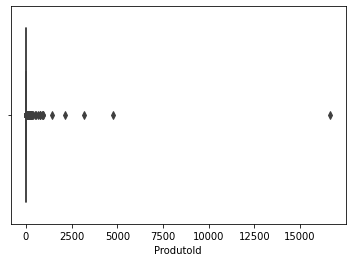

In [0]:
### de acordo com as respostas será montada uma base

df_resposta_produto = df_cliente_produto_navegacao[['resposta11','resposta21','resposta31','resposta41','resposta51','resposta61','resposta71','resposta81','resposta91','ProdutoId','userid']]

sns.boxplot(df_resposta_produto['ProdutoId'].value_counts().sort_values(ascending=False))

In [0]:
###manter na base somente produtos com mais de 1000 users

acima_1000 = df_resposta_produto['ProdutoId'].value_counts()[df_resposta_produto['ProdutoId'].value_counts()>1000].index
print(len(acima_1000))
df_resposta_produto = df_resposta_produto[df_resposta_produto['ProdutoId'].isin(acima_1000)]
df_resposta_produto.shape

5


(28125, 8)

Text(0.5, 1.0, 'Nulos base final')

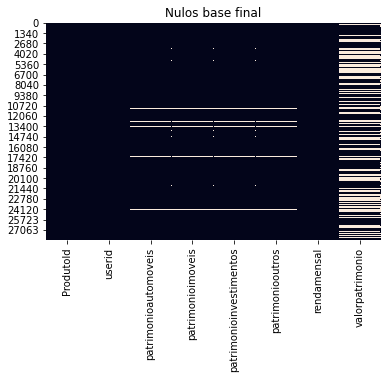

In [0]:
### verificando o total de nulos
graf = sns.heatmap(df_resposta_produto.isnull(), cbar=False)
graf.set_title('Nulos base final')

Text(0.5, 1.0, 'Nulos base final')

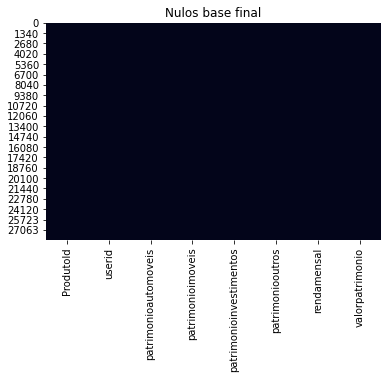

In [0]:
#### insere 0 para os nulos
df_resposta_produto.fillna(0, inplace=True)
graf = sns.heatmap(df_resposta_produto.isnull(), cbar=False)
graf.set_title('Nulos base final')

In [0]:
### One hot encoding da base
df_resposta = pd.get_dummies(df_resposta_produto, columns= ['resposta11','resposta21','resposta31','resposta41','resposta51','resposta61','resposta71','resposta81','resposta91'])
df_resposta.shape
### Construir o modelo de árvore de decisao
y = df_resposta[['ProdutoId']]
X = df_resposta.drop(['ProdutoId','userid'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777) # 70% training and 30% test

In [0]:
### Treinamento da árvore de decisao
clf = DecisionTreeClassifier(criterion='entropy', random_state=777)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [0]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.623844512917753


Text(0.5, 15.0, 'Produto Previsto')

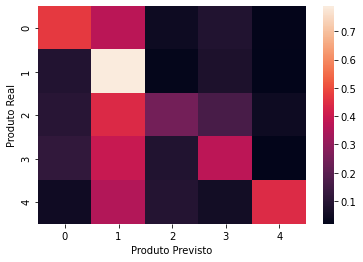

In [0]:
matriz = confusion_matrix(y_test, y_pred)
conf_mat_normalized = matriz.astype('float') / matriz.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('Produto Real')
plt.xlabel('Produto Previsto')

In [0]:
pass

In [0]:
pass

In [0]:
pass

In [0]:
pass

In [0]:
pass

In [0]:
# save the model to disk
filename = 'modelo01.sav'
pickle.dump(model1, open(filename, 'wb'))


In [0]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

In [0]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

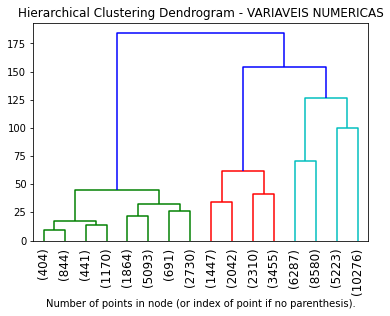

In [0]:
plt.title('Hierarchical Clustering Dendrogram - VARIAVEIS NUMERICAS')
# plot the top three levels of the dendrogram
plot_dendrogram(model1, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.xticks(rotation=90)
plt.show()